# Cancer outcome predictions ( 1 year survival) Classification
 Data from github reposite
 https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv
 
 ## About Data

    ID_Patient_Care_Situation: Care situation of a patient during treatment
    Diagnosed_Condition: The diagnosed condition of the patient
    ID_Patient: Patient identifier number
    Treatment_with_drugs: Class of drugs used during treatment
    Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
    Patient_Age: Age of the patient
    Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
    Patient_Smoker: If the patient was a smoker or not
    Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. ) 

In [191]:
# import all libs
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from dython.data_utils import split_hist
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    

from sklearn.metrics import f1_score   

from imblearn.over_sampling import SMOTE

from collections import Counter


## Now first we only focused on the training data

In [133]:
# import the csv training data
cancer = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv', index_col = 0)
cancer[100:2000:200]

,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,,,,,,,,,,,,,,,,,
29365,41,11547,DX6,51,17.382358,YES,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0
29220,51,3304,Dx2,53,24.485866,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
122,40,8595,DX6,52,20.562478,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
15389,2,10297,Dx6,25,27.587690,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4642,8,5226,DX6,37,21.740370,YES,URBAN,Stable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
16297,43,9990,DX2 DX3,22,22.653662,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
6018,43,9584,DX4,0,24.639267,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12158,29,7623,DX6,66,29.304818,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1751,13,6094,DX5,10,29.388227,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [134]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25079 entries, 16201 to 16072
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       25079 non-null  int64  
 1   Patient_ID                25079 non-null  int64  
 2   Treated_with_drugs        25071 non-null  object 
 3   Patient_Age               25079 non-null  int64  
 4   Patient_Body_Mass_Index   25079 non-null  float64
 5   Patient_Smoker            25079 non-null  object 
 6   Patient_Rural_Urban       25079 non-null  object 
 7   Patient_mental_condition  25079 non-null  object 
 8   A                         23723 non-null  float64
 9   B                         23723 non-null  float64
 10  C                         23723 non-null  float64
 11  D                         23723 non-null  float64
 12  E                         23723 non-null  float64
 13  F                         23723 non-null  float64
 14  Z 

In [135]:
cancer.describe()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


## Cleaning data

In [136]:
# check how many diagnosed conditions and patients are there
print ('Patients', len(np.unique(cancer['Patient_ID'])))
print('Conditions', len(np.unique(cancer['Diagnosed_Condition'])))

Patients 10599
Conditions 53


In [137]:
# Check NA values in each column
cancer.isnull().sum()

Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             8
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1356
B                           1356
C                           1356
D                           1356
E                           1356
F                           1356
Z                           1356
Number_of_prev_cond         1356
Survived_1_year                0
dtype: int64

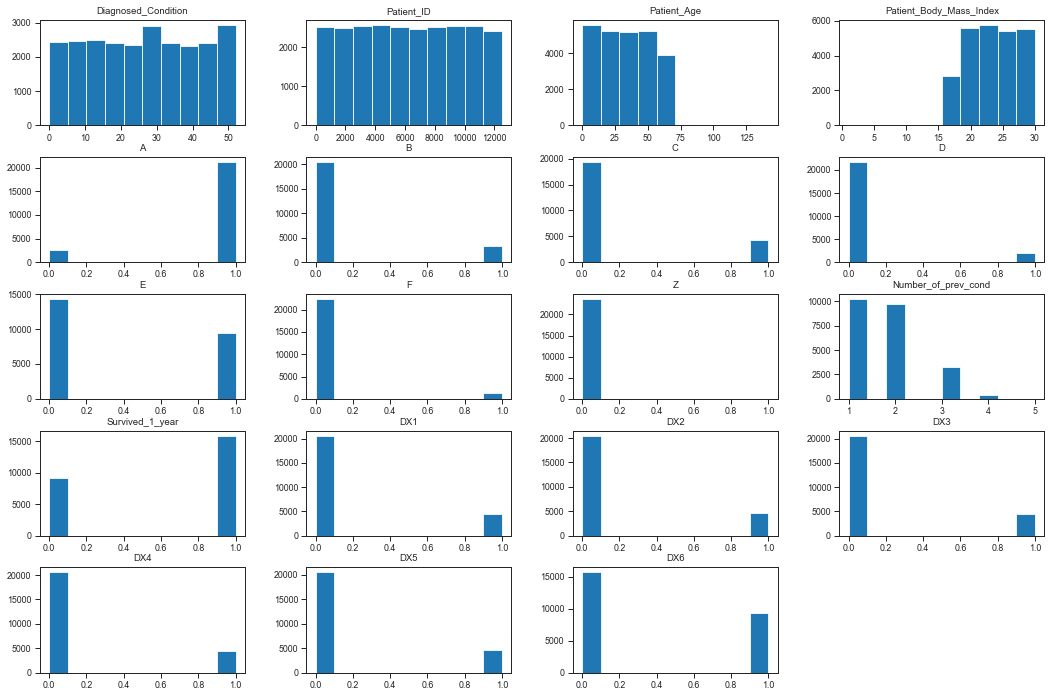

In [152]:
sns.set_context("paper", font_scale=1)
cancer.hist(figsize = (18,12), grid=False)
plt.grid(False)
plt.show()

In [139]:
# see how observations stay if drop NA
# cancer = cancer.dropna()
# cancer.info()

In [140]:
# # check # of diagnosed conditions and patients again after dropna
# print ('Patients', len(np.unique(cancer['Patient_ID'])))
# print('Conditions', len(np.unique(cancer['Diagnosed_Condition'])))

Compared to the original, Patients 10599, Conditions 53. Patient number decreased, not good!

In [141]:
# check if the missing values should all be 0
cancer[cancer['Number_of_prev_cond']==0]['Number_of_prev_cond'].count()

0

The missing values are the patients that do not have previous conditions, so can not just remove them!

In [142]:
## check how many different types are there in treatment:
len(set(cancer['Treated_with_drugs']))

183

In [143]:
# use all upper cases and remove spaces
cancer['Treated_with_drugs'] = cancer['Treated_with_drugs'].str.upper()
# cancer['Treated_with_drugs'] = cancer['Treated_with_drugs'].str.replace(' ', '')
# print(len(set(cancer['Treated_with_drugs'])))
# print(set(cancer['Treated_with_drugs']))

In [157]:
# seperate the treatments into 6 categories

def DX1(treatments):
    if 'DX1' in str(treatments):
        return 1
    else: return 0 
sub2 = 'DX2'
def DX2(treatments):
    if 'DX2' in str(treatments):
        return 1
    else: return 0 
def DX3(treatments):
    if 'DX3' in str(treatments):
        return 1
    else: return 0 
def DX4(treatments):
    if 'DX4' in str(treatments):
        return 1
    else: return 0 
def DX5(treatments):
    if 'DX5' in str(treatments):
        return 1
    else: return 0 
def DX6(treatments):
    if 'DX6' in str(treatments):
        return 1
    else: return 0 

cancer['DX1'] = cancer['Treated_with_drugs'].apply(lambda x: DX1(x))
cancer['DX2'] = cancer['Treated_with_drugs'].apply(lambda x: DX2(x))
cancer['DX3'] = cancer['Treated_with_drugs'].apply(lambda x: DX3(x))
cancer['DX4'] = cancer['Treated_with_drugs'].apply(lambda x: DX4(x))
cancer['DX5'] = cancer['Treated_with_drugs'].apply(lambda x: DX5(x))
cancer['DX6'] = cancer['Treated_with_drugs'].apply(lambda x: DX6(x))

In [156]:
set(cancer['Patient_Smoker'])

{'CANNOTSAY', 'NO', 'YES'}

In [155]:
cancer['Patient_Smoker'] = cancer['Patient_Smoker'].str.upper()
cancer['Patient_Smoker'] = cancer['Patient_Smoker'].str.replace(' ','')
set(cancer['Patient_Smoker'])
set(cancer[cancer['Patient_Smoker'] == 'CANNOTSAY']['Survived_1_year'])

{1}

In [154]:
def remove_s(string):
    return 'YES' if string == 'YESS' else string       
cancer['Patient_Smoker'] = cancer['Patient_Smoker'].apply(lambda x: remove_s(x))
set(cancer['Patient_Smoker'])

{'CANNOTSAY', 'NO', 'YES'}

In [148]:
set(cancer['Patient_Rural_Urban'])

{'RURAL', 'URBAN'}

In [149]:
set(cancer['Patient_mental_condition'])

{'Stable'}

In [151]:
set(cancer['Survived_1_year'])

{0, 1}

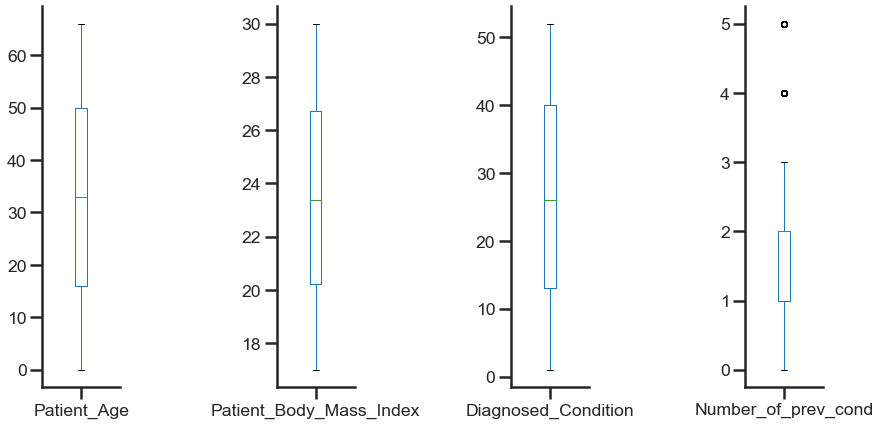

In [131]:
sns.set_context("poster", font_scale=0.8)
cancer[['Patient_Age', 'Patient_Body_Mass_Index', 'Diagnosed_Condition', 'Number_of_prev_cond']].plot(kind='box', layout=(1,4), subplots=True, figsize=(14,7))
sns.despine(top = True, right = True)
plt.subplots_adjust(wspace=2,hspace=2); 

## Notes:
## VERY IMPORTANT: all the NA values in 'Treated_with_drugs' and 'Number_of_prev_cond'!!
'Patient_mental_condition', 'Patient_ID', 'Diagnosed_Condition', 'Treated_with_drugs' should also be checked out before the model

## EDA

In [153]:
# add 0s to the NA cells
cancer['Treated_with_drugs'] = cancer['Treated_with_drugs'].fillna(0)
cancer['Number_of_prev_cond'] = cancer['Number_of_prev_cond'].fillna(0)
cancer['A'] = cancer['A'].fillna(0)
cancer['B'] = cancer['B'].fillna(0)
cancer['C'] = cancer['C'].fillna(0)
cancer['D'] = cancer['D'].fillna(0)
cancer['E'] = cancer['E'].fillna(0)
cancer['F'] = cancer['F'].fillna(0)
cancer['Z'] = cancer['Z'].fillna(0)
cancer.isnull().sum()

Diagnosed_Condition         0
Patient_ID                  0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
DX1                         0
DX2                         0
DX3                         0
DX4                         0
DX5                         0
DX6                         0
dtype: int64

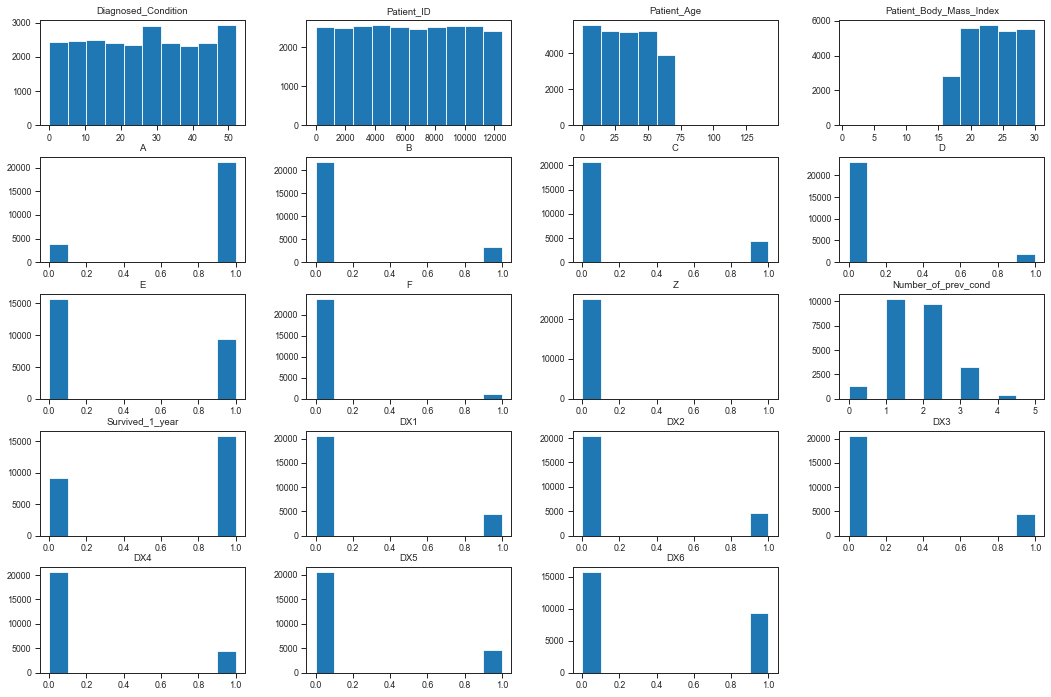

In [93]:
cancer.to_csv('cancer.csv')

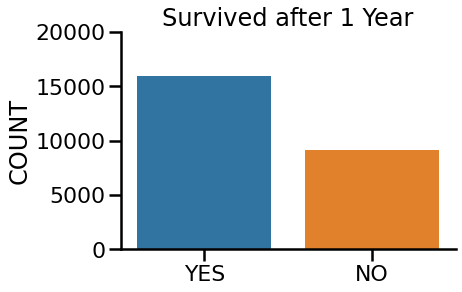

In [94]:
# 'Survived_1_year' as target variable:
sns.set_context("poster", font_scale=1)
ax = sns.countplot(x='Survived_1_year', data=cancer, order = [1,0])
plt.ylim(0, 20000)
sns.despine(top = True, right = True)
ax.set(xticklabels=["YES", "NO"])
ax.set_ylabel("COUNT")
ax.set_xlabel('')
ax.set(title='Survived after 1 Year')
plt.show()

In [95]:
number_survide_patient = len(set(cancer[cancer['Survived_1_year']==1]['Patient_ID']))
number_no_survide_patient = len(set(cancer[cancer['Survived_1_year']==0]['Patient_ID']))

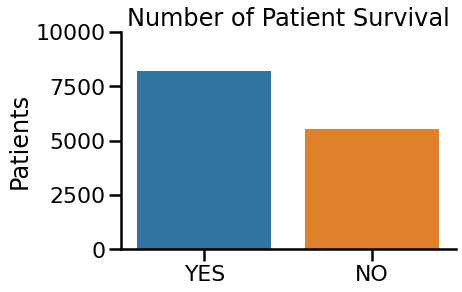

In [96]:
number_survide_patient = len(set(cancer[cancer['Survived_1_year']==1]['Patient_ID']))
number_no_survide_patient = len(set(cancer[cancer['Survived_1_year']==0]['Patient_ID']))
x = ["YES", 'NO']
y = [number_survide_patient, number_no_survide_patient]

ax1 = sns.barplot(x, y)
plt.ylim(0, 10000)
sns.despine(top = True, right = True)
ax1.set(xticklabels=["YES", 'NO'])
ax1.set_ylabel("Patients")
ax1.set_xlabel('')
ax1.set(title='Number of Patient Survival')
plt.show()

# The non_survivors are treated or diagnosed a little bit more.

In [97]:
# Seperate the column_names into numerical and categorical lists: cat and num
column_name = cancer.columns.values.tolist()
print('Column names:', column_name)
cat = []
num = []
for c in column_name:
    if cancer[c].dtype == 'object':
        cat.append(c)
    if cancer[c].dtype == 'int64' or cancer[c].dtype == 'float64':
        num.append(c)
print('Categorical columns:', cat) 
print('Numerical columns:', num)

Column names: ['Diagnosed_Condition', 'Patient_ID', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']
Categorical columns: ['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']
Numerical columns: ['Diagnosed_Condition', 'Patient_ID', 'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']


In [98]:
# check if theses are useful variables
print(set(cancer['Z']))
print(len(set(cancer['Diagnosed_Condition'])))

{0.0, 1.0}
53


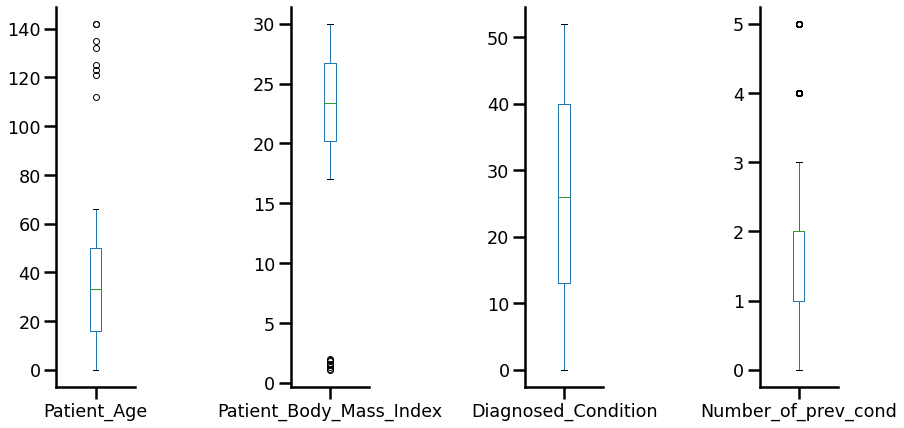

In [99]:
sns.set_context("poster", font_scale=0.8)
cancer[['Patient_Age', 'Patient_Body_Mass_Index', 'Diagnosed_Condition', 'Number_of_prev_cond']].plot(kind='box', layout=(1,4), subplots=True, figsize=(14,7))
sns.despine(top = True, right = True)
plt.subplots_adjust(wspace=2,hspace=2); 

In [100]:
len(cancer[cancer['Patient_Age']>100])

8

In [101]:
len(cancer[cancer['Patient_Body_Mass_Index']<5])

8

In [162]:
# check if these outliers in 2 columns are same datapoints

cancer[cancer['Patient_Age']>100]['Patient_Body_Mass_Index']

cancer[cancer['Patient_Body_Mass_Index']<5]['Patient_Age']

cancer[cancer['Patient_Body_Mass_Index']<5]['Diagnosed_Condition']

Series([], Name: Diagnosed_Condition, dtype: int64)

# These observations need to be removed: After remove theses column 'Z' can be removed also

In [163]:
print (cancer[cancer['Patient_Body_Mass_Index']<5].index)
cancer = cancer.drop(labels=[33007, 33008, 33010, 33011, 33009, 33013, 33003, 33004], axis=0)

cancer = cancer.drop(labels=["Treated_with_drugs", 'Patient_mental_condition','Z'], axis=1)


Int64Index([], dtype='int64', name='ID_Patient_Care_Situation')


KeyError: '[33007 33008 33010 33011 33009 33013 33003 33004] not found in axis'

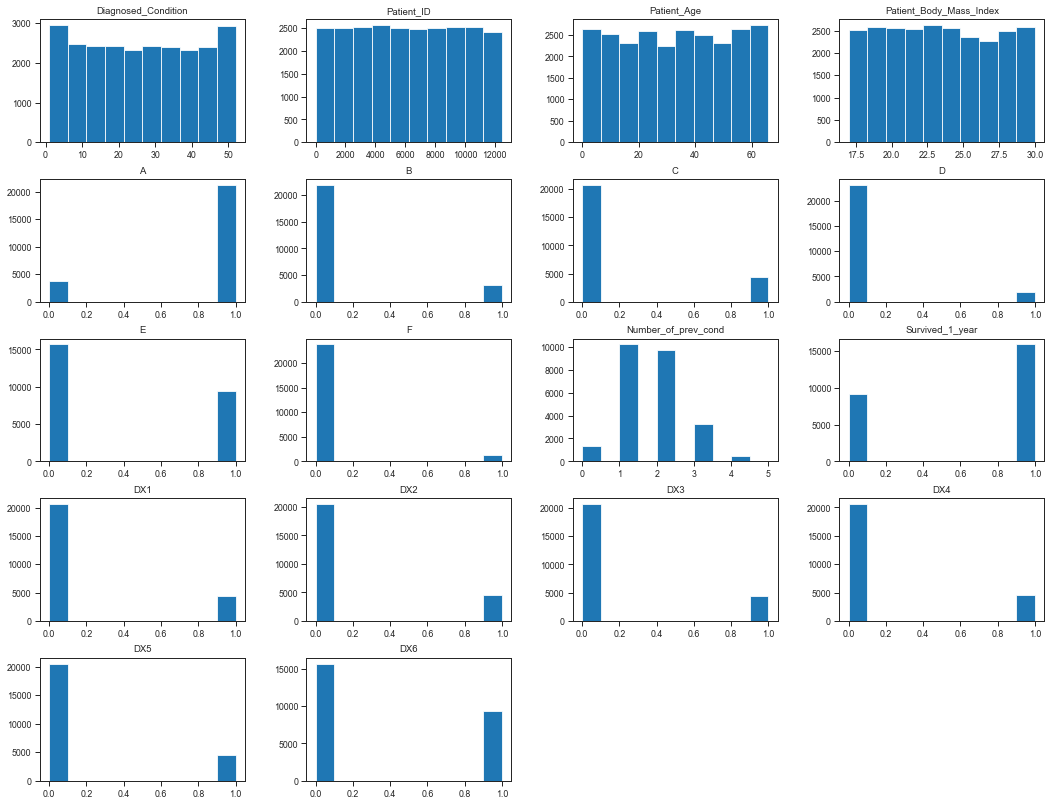

In [166]:
sns.set_context("paper", font_scale=1)
cancer.hist(figsize = (18,14), grid=False)
plt.grid(False)
plt.show()

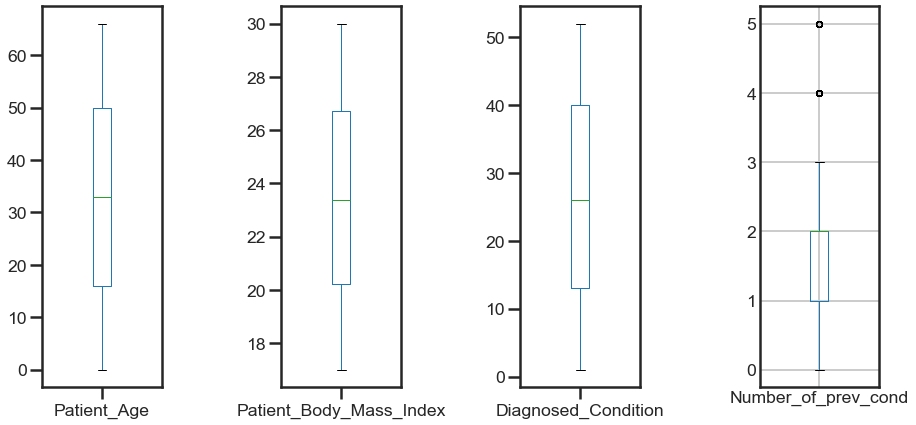

In [104]:
sns.set_style("ticks")
#sns.set_context("poster", font_scale=0.7)
cancer[['Patient_Age', 'Patient_Body_Mass_Index', 'Diagnosed_Condition', 'Number_of_prev_cond']].plot(kind='box', layout=(1,4), subplots=True, figsize=(15,7))

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True
plt.subplots_adjust(wspace=1,hspace=1);  

plt.show()


## 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition' are categorical

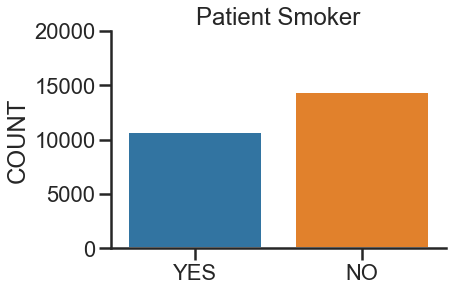

In [105]:
# 'Patient_Smoker' 
sns.set_context("poster", font_scale=1)
ax = sns.countplot(x='Patient_Smoker', data=cancer, order = ['YES', 'NO'])
plt.ylim(0, 20000)
sns.despine(top = True, right = True)
ax.set_ylabel("COUNT")
ax.set_xlabel('')
ax.set(title='Patient Smoker')
plt.show()

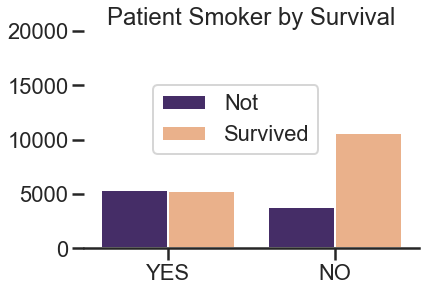

In [106]:
# 'Patient_Smoker' by survival
sns.set_context("poster", font_scale=1)
ax = sns.countplot(x='Patient_Smoker', data=cancer, hue='Survived_1_year', order = ['YES', 'NO'], palette=['#432371',"#FAAE7B"])
plt.ylim(0, 20000)
sns.despine(top = True, left =True, right = True)
ax.set_ylabel("")

ax.set_xlabel('')
ax.set(title='Patient Smoker by Survival')
plt.legend(bbox_to_anchor=(0.7, 0.75), loc=0, borderaxespad=0, labels=[ 'Not', 'Survived'])
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
plt.show()

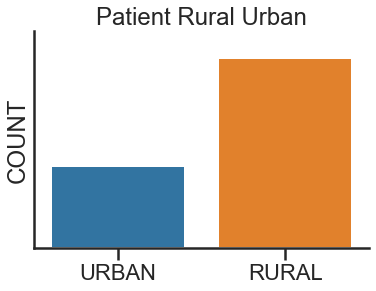

In [107]:
# 'Patient_Rural_Urban' 
sns.set_context("poster", font_scale=1)
ax = sns.countplot(x='Patient_Rural_Urban', data=cancer)
plt.ylim(0, 20000)
sns.despine(top = True, right = True)
ax.set_ylabel("COUNT")
ax.set_xlabel('')
ax.set(title='Patient Rural Urban')
plt.show()

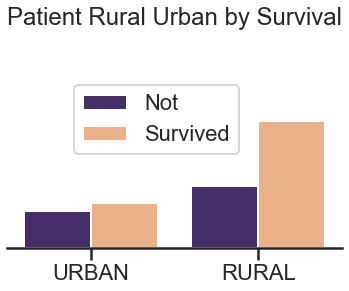

In [108]:
# 'Patient_Rural_Urban' 
sns.set_context("poster", font_scale=1)
ax = sns.countplot(x='Patient_Rural_Urban', hue = 'Survived_1_year', data=cancer, palette=['#432371',"#FAAE7B"])
plt.ylim(0, 20000)
sns.despine(top = True, right = True, left = True)
ax.set_ylabel("COUNT")
ax.set_xlabel('')
ax.set_ylabel("")
ax.set(title='Patient Rural Urban by Survival')
plt.legend(bbox_to_anchor=(0.2, 0.75), loc=2, borderaxespad=0, labels=[ 'Not', 'Survived'])
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
plt.show()

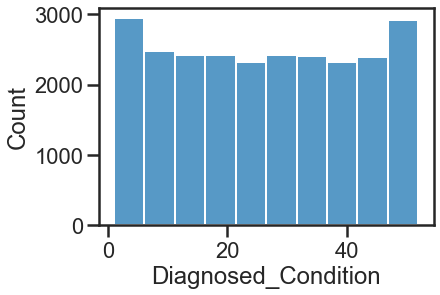

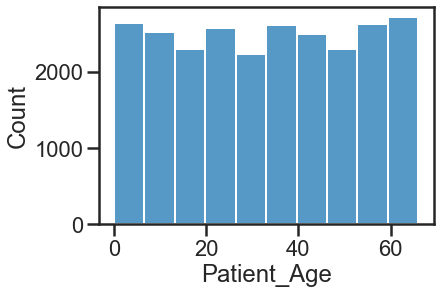

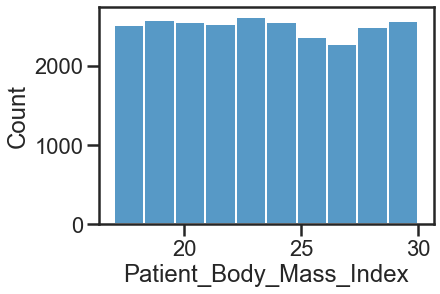

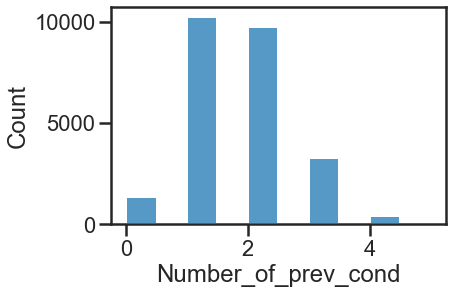

In [109]:
sns.set_context("poster", font_scale=1)
for column in ['Diagnosed_Condition',  'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']:
    
    plt.rcParams['ytick.left'] = True
    plt.rcParams['ytick.labelleft'] = True
    sns.histplot(data=cancer, x=column,  multiple="dodge", bins = 10, stat = 'count')
    

   
    plt.show()

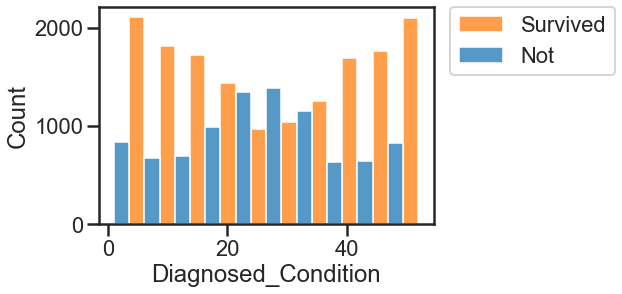

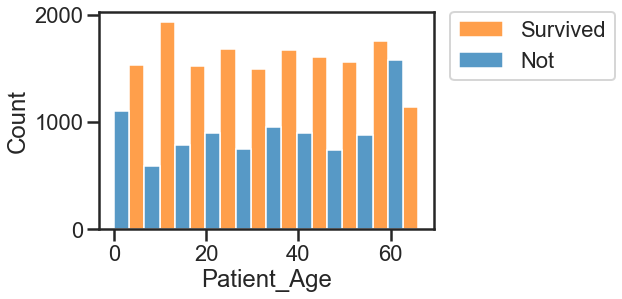

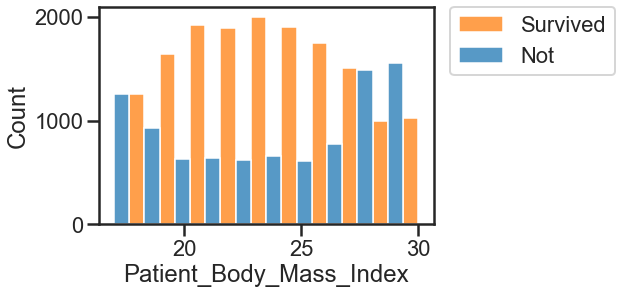

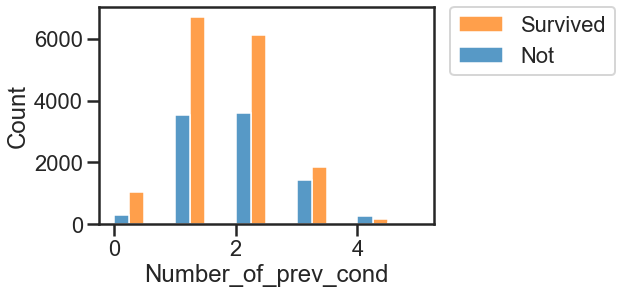

In [110]:
sns.set_context("poster", font_scale=1)
for column in ['Diagnosed_Condition',  'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']:
    
    
    sns.histplot(data=cancer, x=column, hue= 'Survived_1_year', multiple="dodge", bins = 10, stat = 'count')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, labels=[ 'Survived', 'Not'])
    plt.show()

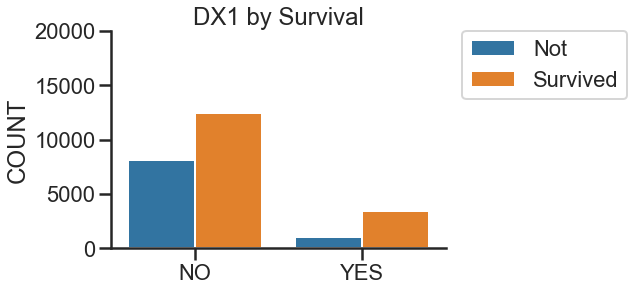

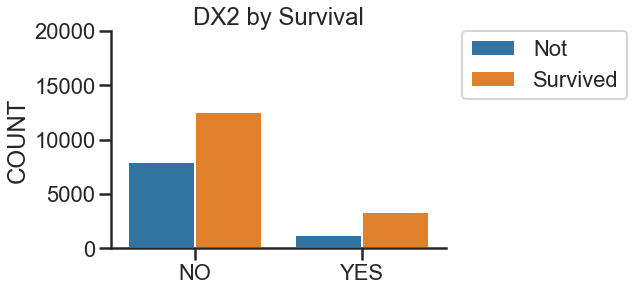

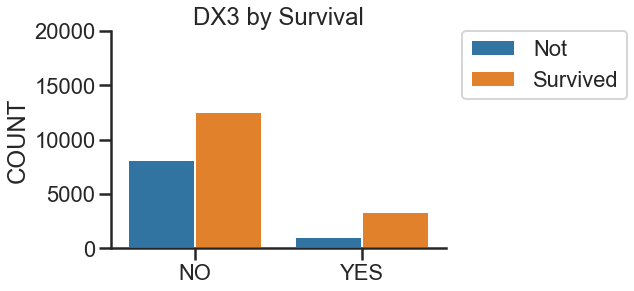

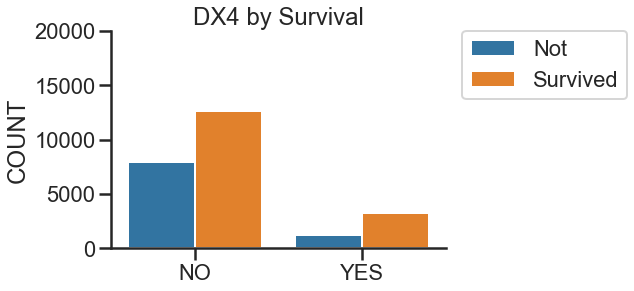

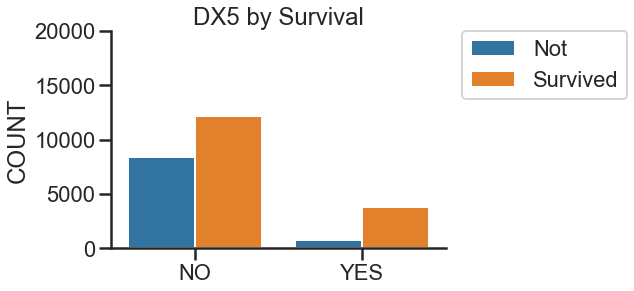

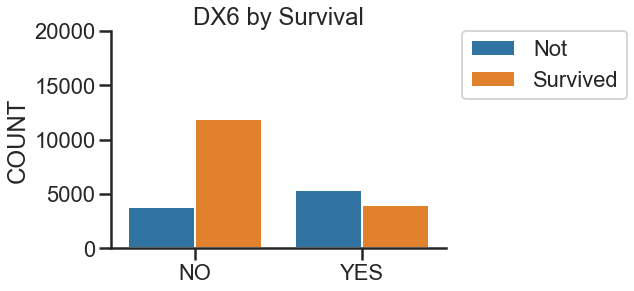

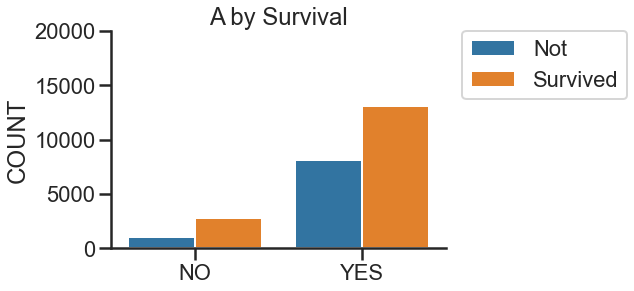

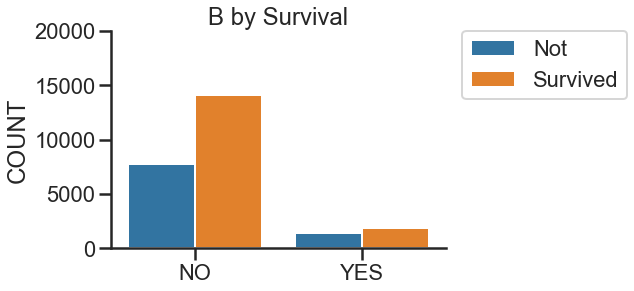

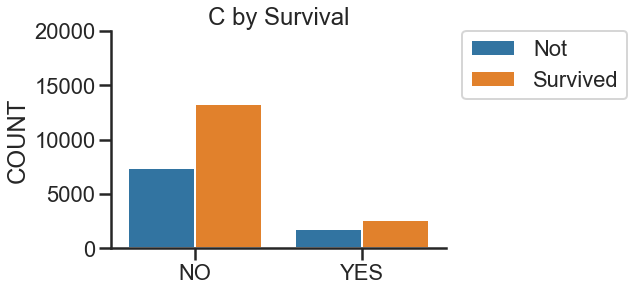

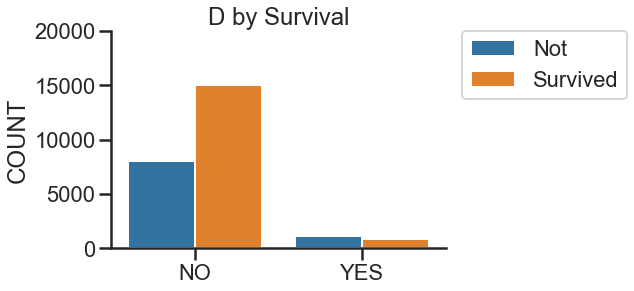

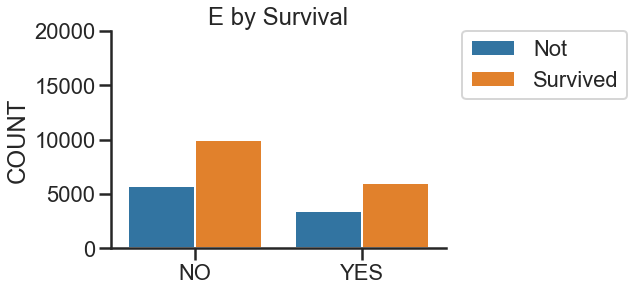

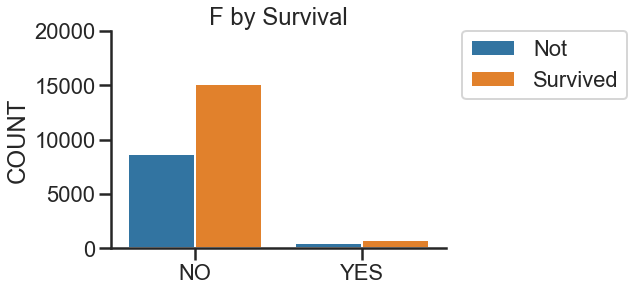

In [111]:
sns.set_context("poster", font_scale=1)
for column in ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'A', 'B', 'C', 'D', 'E', 'F']:
    ax = sns.countplot(x=column, hue = 'Survived_1_year', data=cancer)
    plt.ylim(0, 20000)
    sns.despine(top = True, right = True)
    ax.set_ylabel("COUNT")
    ax.set_xlabel('')
    ax.set(xticklabels=["NO","YES"])
    ax.set(title= column + ' by Survival')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, labels=['Not', 'Survived'])
    plt.show()

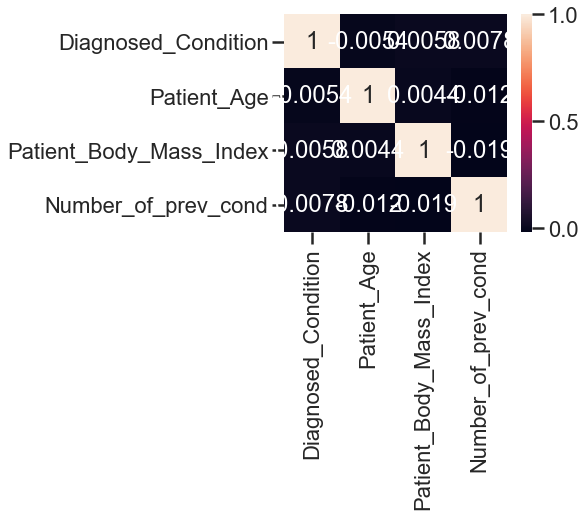

In [112]:
plt.subplots(figsize=(5,4))
sns.heatmap(cancer[['Diagnosed_Condition',  'Patient_Age', 'Patient_Body_Mass_Index','Number_of_prev_cond']].corr(), annot = True);

In [379]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25071 entries, 16201 to 16072
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      25071 non-null  int64  
 1   Patient_ID               25071 non-null  int64  
 2   Patient_Age              25071 non-null  int64  
 3   Patient_Body_Mass_Index  25071 non-null  float64
 4   Patient_Smoker           25071 non-null  object 
 5   Patient_Rural_Urban      25071 non-null  object 
 6   A                        25071 non-null  float64
 7   B                        25071 non-null  float64
 8   C                        25071 non-null  float64
 9   D                        25071 non-null  float64
 10  E                        25071 non-null  float64
 11  F                        25071 non-null  float64
 12  Number_of_prev_cond      25071 non-null  float64
 13  Survived_1_year          25071 non-null  int64  
 14  DX1               

In [113]:
# Seperate the column_names into numerical and categorical lists: cat and num
print(cancer.columns)
cat = cancer[['Patient_Smoker', 'Patient_Rural_Urban', 'A',
       'B', 'C', 'D', 'E', 'F',
       'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']]
cancer_cat = pd.get_dummies(cat,drop_first = True)
print(cancer_cat.shape)

Index(['Diagnosed_Condition', 'Patient_ID', 'Patient_Age',
       'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'A',
       'B', 'C', 'D', 'E', 'F', 'Number_of_prev_cond', 'Survived_1_year',
       'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6'],
      dtype='object')
(25071, 14)


In [115]:
cancer_all = pd.concat([cancer_cat, cancer[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index','Number_of_prev_cond' ]]],axis =1)
cancer_all.shape

(25071, 18)

In [184]:
X = cancer_all
y = cancer['Survived_1_year']

over = SMOTE(sampling_strategy=1)
X, y = over.fit_resample(X, y)
counter = Counter(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)    
#scaler = preprocessing.MinMaxScaler().fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)

print(sum(y_train==0))
print(y_train.shape)


12733
(25440,)


Tuned Logistic Regression Parameter: {'C': 0.05736152510448681, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      3167
           1       0.76      0.67      0.71      3193

    accuracy                           0.72      6360
   macro avg       0.73      0.73      0.72      6360
weighted avg       0.73      0.72      0.72      6360



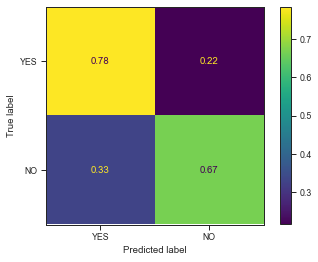

In [186]:
from sklearn.model_selection import GridSearchCV
# Create the hyperparameter grid
c_space = np.logspace(-4, 4, 30)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')
# Fit it to the training data
logreg_cv.fit(X_train,y_train)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

best_clf = logreg_cv.best_estimator_
y_pred = best_clf.predict(X_test)

#Define the indexing for each possible label in a dictionary
class_to_index = {"YES":1, "NO":0}

#Creates a reverse dictionary
index_to_class = {1: "YES",  0: "NO"}

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

print(classification_report(y_test_labels, y_pred_labels))

y_unique = ["YES",'NO']
cm = confusion_matrix(y_test, y_pred, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()


0.7875751889363014


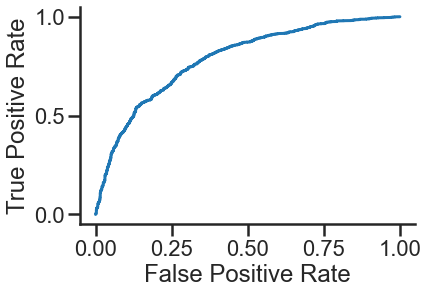

In [119]:
y_pred_proba = best_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sns.despine()
plt.show()

In [120]:
# Try RandomSearchCV using more hyper parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = -1, scoring = 'f1_macro')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [200, 244, 288, 333,
                                                         377, 422, 466, 511,
                                                         555, 600]},
                   random_state=1, scoring='f1_macro', verbose=2)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2849
           1       0.87      0.88      0.88      3193

    accuracy                           0.87      6042
   macro avg       0.87      0.87      0.87      6042
weighted avg       0.87      0.87      0.87      6042



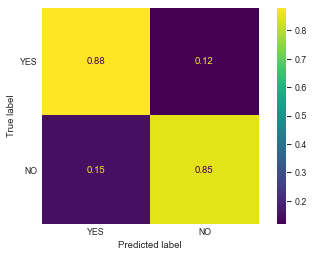

In [209]:
X = cancer_all
y = cancer['Survived_1_year']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)
counter = Counter(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
RF = RandomForestClassifier(n_estimators=400, max_depth =20, min_samples_split=2, min_samples_leaf = 2, bootstrap= False)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))

#Define the indexing for each possible label in a dictionary
class_to_index = {"YES":1, "NO":0}

#Creates a reverse dictionary
index_to_class = {1: "YES",  0: "NO"}

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels =["YES",'NO'], normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["YES",'NO'])
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

0.9506387858426097


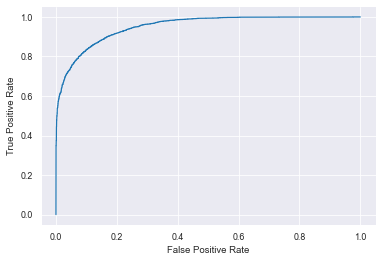

In [206]:
from sklearn import preprocessing, metrics
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sns.despine()
plt.show()

##### Feature Importance

[0.03519384 0.01810412 0.01925556 0.03548485 0.02120267 0.00529042
 0.0378292  0.03200986 0.03186056 0.03116416 0.05458465 0.07051091
 0.06621677 0.0227937  0.15518184 0.11065862 0.20986878 0.0427895 ]
18


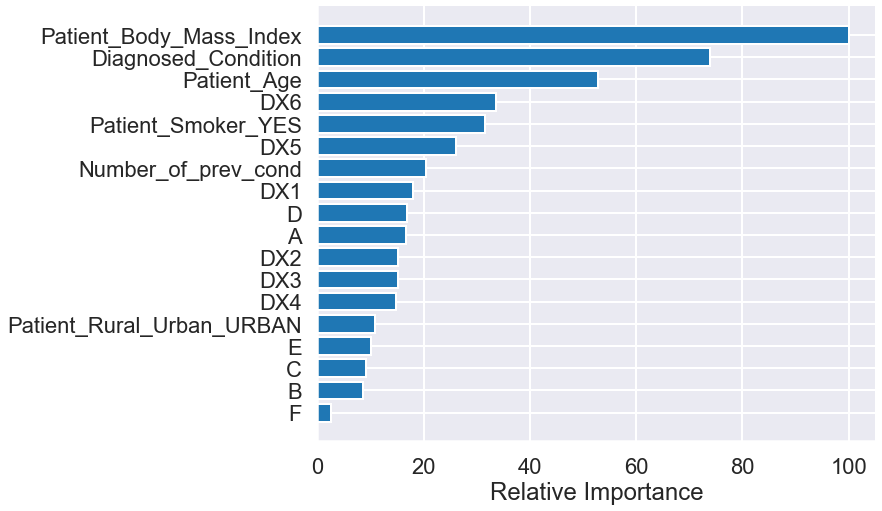

In [217]:
sns.set_context("poster", font_scale=1)

feature_importance = RF.feature_importances_
print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
sns.despine(top = True, right = True)
plt.show()

In [197]:
# train_tf.shape
#Tensorflow / Keras

from keras.models import Sequential
from keras.layers import Dense,Dropout

X = cancer_all
y = cancer['Survived_1_year']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)
counter = Counter(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)    


model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=18))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(60, activation='relu'))         
model.add(Dense(2, activation='softmax')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall']) 
model.summary()



#Compile the model so it can be trained
model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 2)                 122       
                                                                 
Total params: 13,954
Trainable params: 13,954
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
255/255 [==============================] 

In [199]:
#Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)


cm = confusion_matrix(y_test, y_pred, normalize = 'true')


              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3167
           1       0.77      0.77      0.77      3193

    accuracy                           0.77      6360
   macro avg       0.77      0.77      0.77      6360
weighted avg       0.77      0.77      0.77      6360



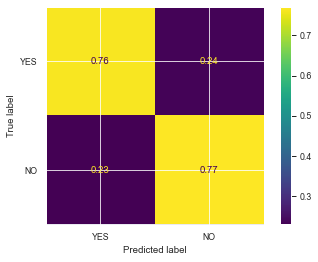

In [200]:
print(classification_report(y_test, y_pred))



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [210]:
## Use CountVecterizer and tuned parameters
from sklearn.svm import SVC
SVCCount = SVC(C=1, degree=0, gamma=1, kernel='linear')
SVCCount.fit(X_train, y_train)
y_pred = SVCCount.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2849
           1       0.77      0.71      0.74      3193

    accuracy                           0.74      6042
   macro avg       0.74      0.74      0.74      6042
weighted avg       0.74      0.74      0.74      6042



NameError: name 'y_pred_Count' is not defined

              precision    recall  f1-score   support

           0       0.86      0.06      0.12      2849
           1       0.54      0.99      0.70      3193

    accuracy                           0.55      6042
   macro avg       0.70      0.53      0.41      6042
weighted avg       0.69      0.55      0.43      6042



In [ ]:
# hyper prameter tuning for SVC (2):  ## some tuning has been done using tfidf, results showed in a seperate file
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [1,10, 100], 'gamma': [10, 1, 0.1], 'kernel' : ['rbf','poly','sigmoid','linear'],'degree': [0]}
grid = GridSearchCV(SVC(),param_grid,scoring='accuracy', verbose=10)
grid.fit(Count_train,y_train)
 

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [624]:
# pip install plot-metric

Note: you may need to restart the kernel to use updated packages.


In [201]:
y_pred_proba = best_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
#create ROC curve
plt.plot(fpr,tpr)
x = np.linspace(0,1,100)
y = x
plt.plot(x, y, '-r', label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sns.despine()
plt.show()

AttributeError: module 'keras.metrics' has no attribute 'roc_curve'

In [215]:
model =['LogisticRegression', 'RandomForest', 'XGboost', 'SVC']
Accuracy= [0.72, 0.88,0.88, 0.74]
Recall_for_0 = [0.78, 0.86, 0.87,0.76]
AUC = [0.776, 0.950,0.953, 0.829]

In [216]:
df = pd.DataFrame(list(zip(model, Accuracy,Recall_for_0, AUC)),
               columns =['Model', 'Accuracy', 'Recall_for_0', 'AUC'])
print(df.set_index('Model'))

                    Accuracy  Recall_for_0    AUC
Model                                            
LogisticRegression      0.72          0.78  0.776
RandomForest            0.88          0.86  0.950
XGboost                 0.88          0.87  0.953
SVC                     0.74          0.76  0.829


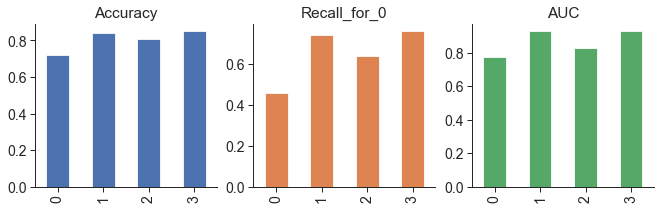

In [740]:
# 'Patient_Smoker' by survival
sns.set_context("paper", font_scale=1.6)

df[[ 'Accuracy', 'Recall_for_0', 'AUC']].plot(kind='bar', layout=(1,4), subplots=True, figsize=(15,3),legend = False, xticks=df.index)


#plt.subplots_adjust(wspace=1,hspace=1);  

ax.set(title='Patient Smoker by Survival')
ax.set_xticks(range(4))
ax.set_xticklabels(['LG', 'RF', 'NN', 'XG'],rotation=90)

sns.despine()
plt.xticks(ticks = df.index, labels=['LG', 'RF', 'NN', 'XG'])
plt.show()